<a href="https://colab.research.google.com/github/grale13/cursoad/blob/main/Modulo_3_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Muestreo - Tema 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#Sampling Methods

##Simple random sampling

In [2]:
#Population
data = list(range(0,5))
data

[0, 1, 2, 3, 4]

In [8]:
simple_without_repetition = random.sample(data,k=3)
simple_without_repetition

[0, 2, 3]

In [9]:
simple_with_repetition = random.choices(data,k=10)
simple_with_repetition

[1, 4, 2, 4, 4, 3, 4, 3, 2, 4]

In [10]:
# copiar antes el archivo Iris.csv a "content"
df=pd.read_csv('Iris.csv')
#columns = ['sepal lenght in cm', 'sepal width in cm', 'petal lenght in cm', 'petal with in cm', 'class']
#df.columns = columns
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##ScikitLearn

In [11]:
from sklearn import datasets

In [12]:
iris = datasets.load_iris(as_frame = True)
population = iris.frame
population

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
population['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

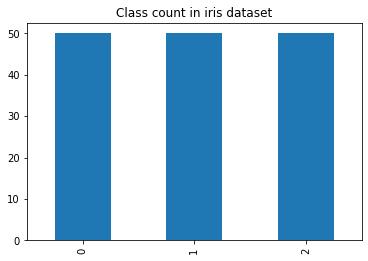

In [14]:
population['target'].value_counts().plot(kind="bar", title="Class count in iris dataset")

##Stratified sampling

In [15]:
# lambda function = arguments : expression
x = lambda a: a + 20

In [16]:
print(x(10))

30


#Select two plants of each class randomly

In [17]:
sample = population.groupby("target", group_keys = False).apply(lambda x: x.sample(2))
sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
22,4.6,3.6,1.0,0.2,0
20,5.4,3.4,1.7,0.2,0
82,5.8,2.7,3.9,1.2,1
81,5.5,2.4,3.7,1.0,1
103,6.3,2.9,5.6,1.8,2
109,7.2,3.6,6.1,2.5,2


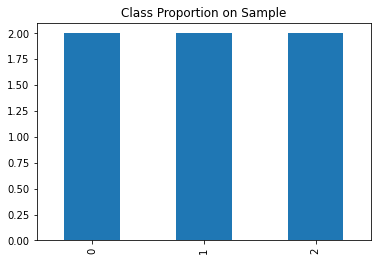

In [18]:
sample['target'].value_counts().plot(kind="bar", title="Class Proportion on Sample")

#Titanic

In [20]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

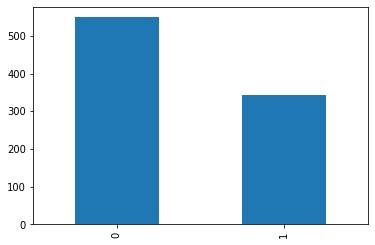

In [22]:
df['Survived'].value_counts().plot(kind="bar")

#Undersampling

In [23]:
sample = df.groupby("Survived", group_keys = False).apply(lambda group: group.sample(342))
sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.2500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S


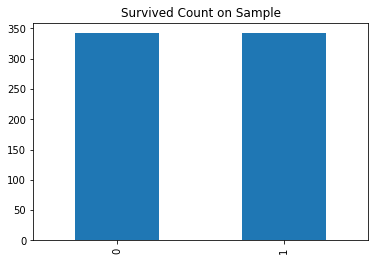

In [24]:
sample['Survived'].value_counts().plot(kind="bar", title="Survived Count on Sample")

#Oversampling

In [26]:
sample = df.groupby("Survived", group_keys = False).apply(lambda group: group.sample(n = 549, replace = True))

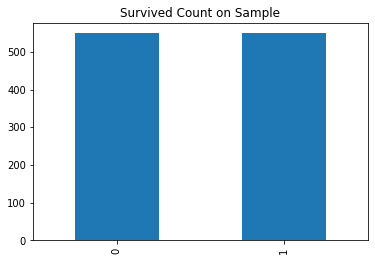

In [27]:
sample['Survived'].value_counts().plot(kind="bar", title="Survived Count on Sample")

#Train-test Split

In [28]:
from sklearn.model_selection import train_test_split


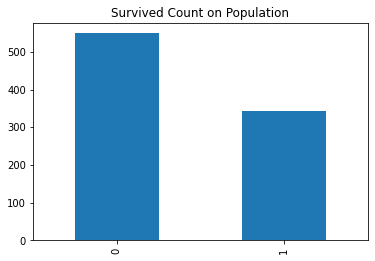

In [29]:
df['Survived'].value_counts().plot(kind="bar", title = "Survived Count on Population")

In [30]:
stratified_sample, _ = train_test_split(df, train_size = .1, stratify = df[["Survived"]], random_state = 0)
# stratified_sample

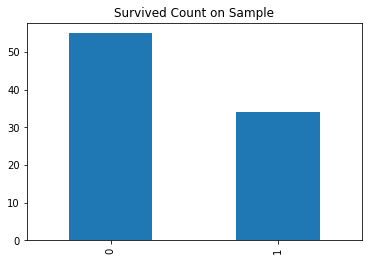

In [31]:
stratified_sample['Survived'].value_counts().plot(kind="bar", title = "Survived Count on Sample")

#Systematic sampling

In [32]:
def systematic_sampling(df, step):
    
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

In [33]:
systematic_sampling(df, 400)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.925,NaN,S
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.000,NaN,S


#Activity

In [34]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

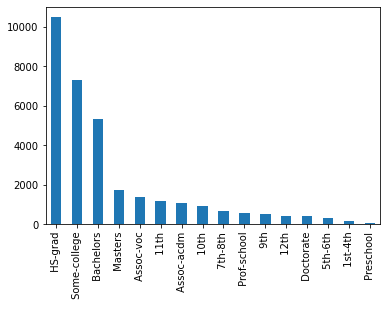

In [35]:
df[' Bachelors'].value_counts().plot(kind="bar")